In [45]:
import pandas as pd 
import numpy as np 
from pandas_datareader import data as web

import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
indxes = ['^GSPC', '^IXIC', '^DJI', '^OMX', '^GDAXI', '^AXJO', '^FCHI', '^HSI', '^BVSP', '^N225']

indices = web.DataReader(indxes,'yahoo', start = '01-01-2000')['Close']
indices

Symbols,^GSPC,^IXIC,^DJI,^OMX,^GDAXI,^AXJO,^FCHI,^HSI,^BVSP,^N225
Date,,,,,,,,,,
2000-01-03,1455.219971,4131.149902,11357.509766,NaN,6750.759766,3093.699951,5917.370117,17369.630859,16930.0,NaN
2000-01-04,1399.420044,3901.689941,10997.929688,NaN,6586.950195,3018.699951,5672.020020,17072.820312,15851.0,19002.859375
2000-01-05,1402.109985,3877.540039,11122.650391,NaN,6502.069824,2999.300049,5479.700195,15846.719727,16245.0,18542.550781
2000-01-06,1403.449951,3727.129883,11253.259766,NaN,6474.919922,3023.399902,5450.109863,15153.230469,16107.0,18168.269531
2000-01-07,1441.469971,3882.620117,11522.559570,NaN,6780.959961,NaN,5539.609863,15405.629883,16309.0,18193.410156
...,...,...,...,...,...,...,...,...,...,...
2021-03-01,3901.820068,13588.830078,31535.509766,2054.669922,14012.820312,6762.299805,5792.790039,29452.570312,110335.0,29663.500000
2021-03-02,3870.290039,13358.790039,31391.519531,2067.100098,14039.799805,6818.000000,5809.729980,29095.859375,111540.0,29408.169922
2021-03-03,3819.719971,12997.750000,31270.089844,2073.780029,14080.030273,6760.700195,5830.060059,29880.419922,111184.0,29559.099609


In [3]:
indices_daily_rets = indices.pct_change()

In [4]:
corr = indices_daily_rets.corr()
corr.style.background_gradient(cmap='RdYlGn').set_precision(2)

Symbols,^GSPC,^IXIC,^DJI,^OMX,^GDAXI,^AXJO,^FCHI,^HSI,^BVSP,^N225
Symbols,,,,,,,,,,
^GSPC,1.00,0.90,0.97,0.59,0.60,0.27,0.57,0.21,0.60,0.14
^IXIC,0.90,1.00,0.82,0.55,0.55,0.24,0.49,0.20,0.55,0.12
^DJI,0.97,0.82,1.00,0.58,0.59,0.26,0.56,0.21,0.58,0.15
^OMX,0.59,0.55,0.58,1.00,0.85,0.29,0.85,0.36,0.46,0.26
^GDAXI,0.60,0.55,0.59,0.85,1.00,0.29,0.90,0.35,0.45,0.27
^AXJO,0.27,0.24,0.26,0.29,0.29,1.00,0.31,0.28,0.22,0.28
^FCHI,0.57,0.49,0.56,0.85,0.90,0.31,1.00,0.38,0.46,0.30
^HSI,0.21,0.20,0.21,0.36,0.35,0.28,0.38,1.00,0.27,0.55
^BVSP,0.60,0.55,0.58,0.46,0.45,0.22,0.46,0.27,1.00,0.16


In [6]:
cum_rets_indxs = (1 + indices_daily_rets).cumprod()

In [7]:
cum_rets_indxs

Symbols,^GSPC,^IXIC,^DJI,^OMX,^GDAXI,^AXJO,^FCHI,^HSI,^BVSP,^N225
Date,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,0.961655,0.944456,0.968340,NaN,0.975735,0.975757,0.958537,0.982912,0.936267,NaN
2000-01-05,0.963504,0.938610,0.979321,NaN,0.963161,0.969486,0.926036,0.912323,0.959539,0.975777
2000-01-06,0.964425,0.902202,0.990821,NaN,0.959139,0.977276,0.921036,0.872398,0.951388,0.956081
2000-01-07,0.990551,0.939840,1.014532,NaN,1.004474,0.977276,0.936161,0.886929,0.963320,0.957404
...,...,...,...,...,...,...,...,...,...,...
2021-03-01,2.681258,3.289358,2.776622,3.496061,2.075740,2.185829,0.978947,1.695636,6.517129,1.561002
2021-03-02,2.659591,3.233674,2.763944,3.517211,2.079736,2.203834,0.981809,1.675099,6.588305,1.547566
2021-03-03,2.624840,3.146279,2.753252,3.528577,2.085696,2.185312,0.985245,1.720268,6.567277,1.555508


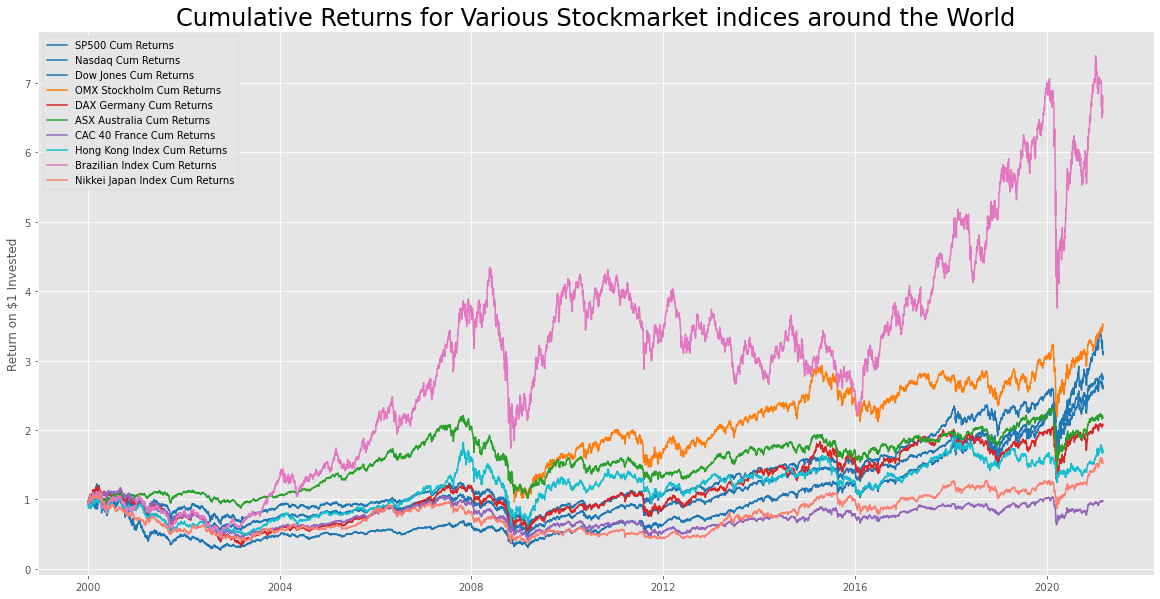

In [70]:
f, ax = plt.subplots(figsize=(20,10))

ax.plot(cum_rets_indxs['^GSPC'], color='tab:blue', label = 'SP500 Cum Returns') 
ax.plot(cum_rets_indxs['^IXIC'], color='tab:blue', label = 'Nasdaq Cum Returns') 
ax.plot(cum_rets_indxs['^DJI'], color='tab:blue', label = 'Dow Jones Cum Returns') 
ax.plot(cum_rets_indxs['^OMX'], color='tab:orange', label = 'OMX Stockholm Cum Returns') 
ax.plot(cum_rets_indxs['^GDAXI'], color='tab:red', label = 'DAX Germany Cum Returns') 
ax.plot(cum_rets_indxs['^AXJO'], color='tab:green', label = 'ASX Australia Cum Returns') 
ax.plot(cum_rets_indxs['^FCHI'], color='tab:purple', label = 'CAC 40 France Cum Returns') 
ax.plot(cum_rets_indxs['^HSI'], color='tab:cyan', label = 'Hong Kong Index Cum Returns')
ax.plot(cum_rets_indxs['^BVSP'], color='tab:pink', label = 'Brazilian Index Cum Returns') 
ax.plot(cum_rets_indxs['^N225'], color='salmon', label = 'Nikkei Japan Index Cum Returns') 


ax.grid(True)
ax.set_title('Cumulative Returns for Various Stockmarket indices around the World', fontsize=24)
ax.set_ylabel('Return on $1 Invested')
ax.legend()

In [11]:
roi = cum_rets_indxs.tail(1)

In [14]:
roi

Symbols,^GSPC,^IXIC,^DJI,^OMX,^GDAXI,^AXJO,^FCHI,^HSI,^BVSP,^N225
Date,,,,,,,,,,
2021-03-05,2.640109,3.127495,2.77317,3.485682,2.062092,2.169183,0.977233,1.675239,6.804607,1.518946


In [15]:
data = {'Index': ['SP500', 'Nasdaq', 'Dow Jones', 'OMX Stockholm', 'DAX Germany', 'ASX Australia', 'CAC France', 'Hang Seng Hong Kong', 'Brazil Index', 'Nikkei Japan'], 
        'ROI':[2.640109, 3.127495, 2.77317, 3.485682, 2.062092, 2.169183, 0.977233, 1.675239, 6.804607, 1.518946]} 
df = pd.DataFrame(data) 
df 

,Index,ROI
0,SP500,2.640109
1,Nasdaq,3.127495
2,Dow Jones,2.773170
3,OMX Stockholm,3.485682
4,DAX Germany,2.062092
5,ASX Australia,2.169183
6,CAC France,0.977233
7,Hang Seng Hong Kong,1.675239
8,Brazil Index,6.804607
9,Nikkei Japan,1.518946


In [16]:
df = df.set_index('Index')

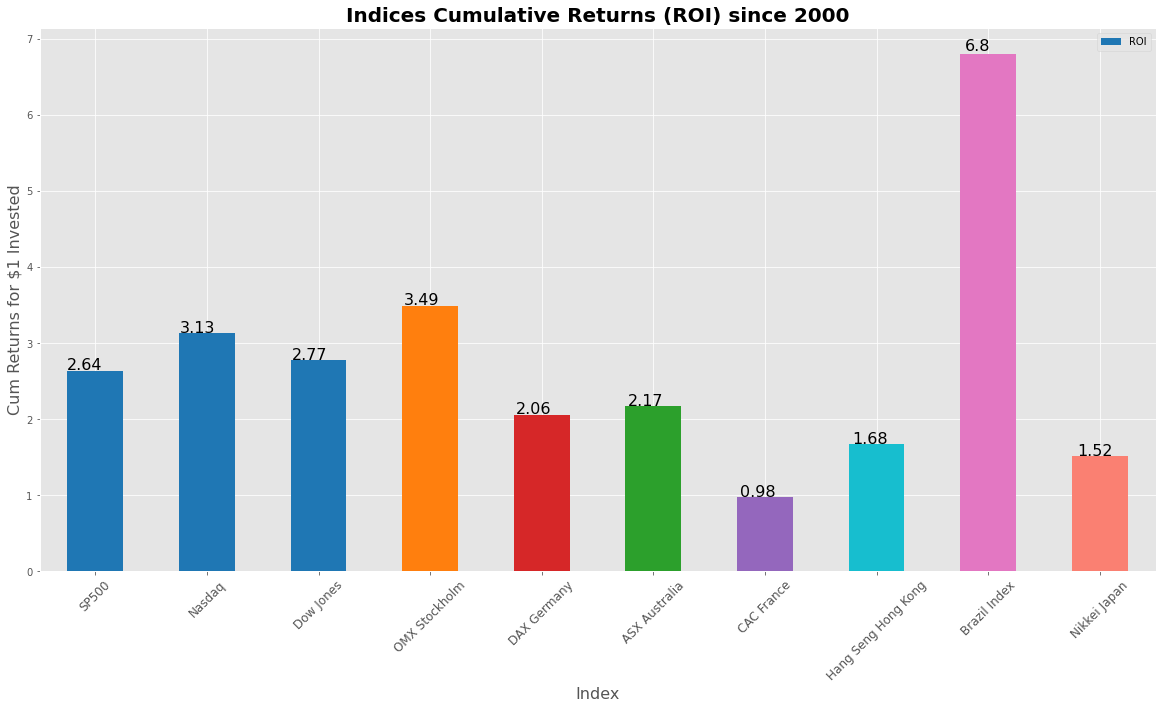

In [69]:
f,ax=plt.subplots(figsize=(20,10))

df['ROI'].plot.bar(color=['tab:blue', 'tab:blue', 'tab:blue', 'tab:orange', 'tab:red', 'tab:green', 'tab:purple', 'tab:cyan', 'tab:pink', 'salmon'])
ax.set_title('Indices Cumulative Returns (ROI) since 2000', fontsize = 20, fontweight = 'bold')
ax.set_xlabel('Index', fontsize = 16)
ax.set_ylabel('Cum Returns for $1 Invested', fontsize = 16)
ax.legend()
plt.xticks(rotation=45, fontsize = 12)

for p in ax.patches:
    ax.annotate(str(p.get_height().round(2)), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=16)

In [21]:
SR_sp500 = (indices_daily_rets['^GSPC'].mean() * 252) / (indices_daily_rets['^GSPC'].std() * np.sqrt(252))
print(f' the Annualized Sharpe Ratio for just holding the SP500 is {SR_sp500.round(2)}')
SR_nasdaq = (indices_daily_rets['^IXIC'].mean() * 252) / (indices_daily_rets['^IXIC'].std() * np.sqrt(252))
print(f' the Annualized Sharpe Ratio for just holding the Nasdaq is {SR_nasdaq.round(2)}')
SR_dji = (indices_daily_rets['^DJI'].mean() * 252) / (indices_daily_rets['^DJI'].std() * np.sqrt(252))
print(f' the Annualized Sharpe Ratio for just holding the Dow Jones is {SR_dji.round(2)}')
SR_omx = (indices_daily_rets['^OMX'].mean() * 252) / (indices_daily_rets['^OMX'].std() * np.sqrt(252))
print(f' the Annualized Sharpe Ratio for just holding the OMX is {SR_omx.round(2)}')
SR_dax = (indices_daily_rets['^GDAXI'].mean() * 252) / (indices_daily_rets['^GDAXI'].std() * np.sqrt(252))
print(f' the Annualized Sharpe Ratio for just holding the DAX Germany is {SR_dax.round(2)}')
SR_asx = (indices_daily_rets['^AXJO'].mean() * 252) / (indices_daily_rets['^AXJO'].std() * np.sqrt(252))
print(f' the Annualized Sharpe Ratio for just holding the ASX Australia is {SR_asx.round(2)}')
SR_cac = (indices_daily_rets['^FCHI'].mean() * 252) / (indices_daily_rets['^FCHI'].std() * np.sqrt(252))
print(f' the Annualized Sharpe Ratio for just holding the French CAC is {SR_cac.round(2)}')
SR_hsi = (indices_daily_rets['^HSI'].mean() * 252) / (indices_daily_rets['^HSI'].std() * np.sqrt(252))
print(f' the Annualized Sharpe Ratio for just holding the Hong Kong Hang Seng Index is {SR_hsi.round(2)}')
SR_brazil = (indices_daily_rets['^BVSP'].mean() * 252) / (indices_daily_rets['^BVSP'].std() * np.sqrt(252))
print(f' the Annualized Sharpe Ratio for just holding the Brazil Stock Index is {SR_brazil.round(2)}')
SR_nikkei = (indices_daily_rets['^N225'].mean() * 252) / (indices_daily_rets['^N225'].std() * np.sqrt(252))
print(f' the Annualized Sharpe Ratio for just holding the Nikkei 225 Japn is {SR_nikkei.round(2)}')

 the Annualized Sharpe Ratio for just holding the SP500 is 0.31
 the Annualized Sharpe Ratio for just holding the Nasdaq is 0.32
 the Annualized Sharpe Ratio for just holding the Dow Jones is 0.33
 the Annualized Sharpe Ratio for just holding the OMX is 0.56
 the Annualized Sharpe Ratio for just holding the DAX Germany is 0.25
 the Annualized Sharpe Ratio for just holding the ASX Australia is 0.29
 the Annualized Sharpe Ratio for just holding the French CAC is 0.1
 the Annualized Sharpe Ratio for just holding the Hong Kong Hang Seng Index is 0.21
 the Annualized Sharpe Ratio for just holding the Brazil Stock Index is 0.43
 the Annualized Sharpe Ratio for just holding the Nikkei 225 Japn is 0.19


In [22]:
data1 = {'Index': ['SP500', 'Nasdaq', 'Dow Jones', 'OMX Stockholm', 'DAX Germany', 'ASX Australia', 'CAC France', 'Hang Seng Hong Kong', 'Brazil Index', 'Nikkei Japan'], 
        'Sharpe Ratio':[.31, .32, .33, .56, .25, .29, .1, .21, .43, .19]} 
  
df1 = pd.DataFrame(data1) 
  
df1 

,Index,Sharpe Ratio
0,SP500,0.31
1,Nasdaq,0.32
2,Dow Jones,0.33
3,OMX Stockholm,0.56
4,DAX Germany,0.25
5,ASX Australia,0.29
6,CAC France,0.10
7,Hang Seng Hong Kong,0.21
8,Brazil Index,0.43
9,Nikkei Japan,0.19


In [23]:
df1 = df1.set_index('Index')

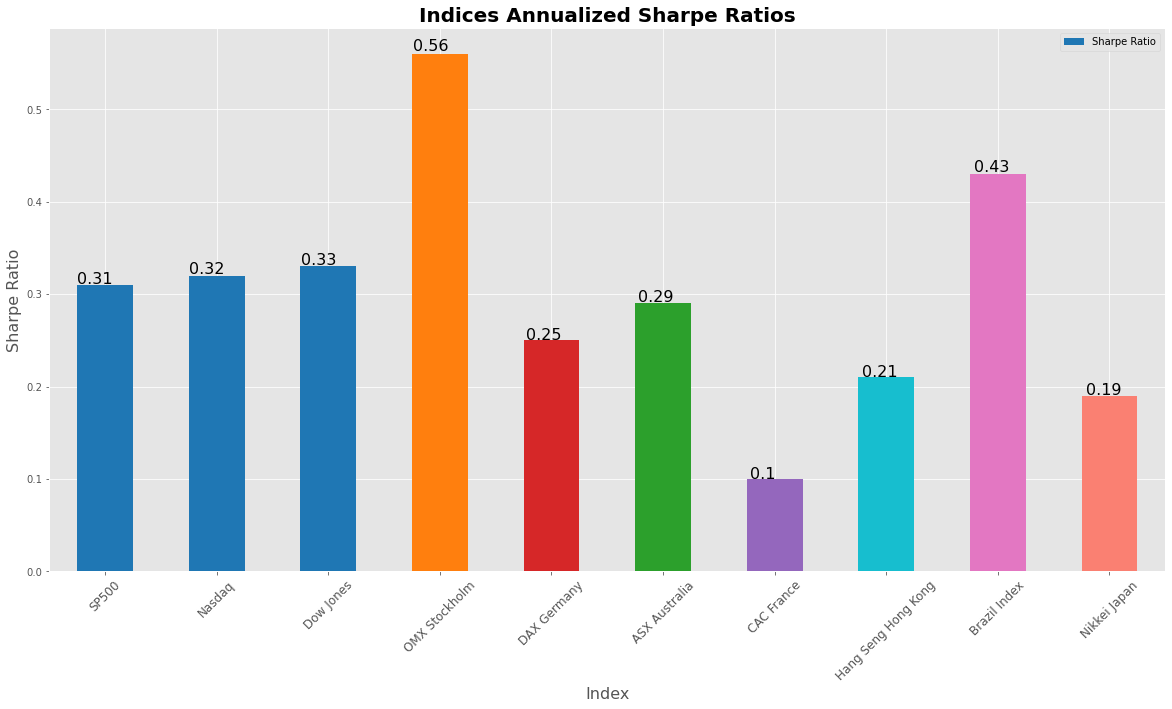

In [68]:
# df1 = df1.sort_values('Sharpe Ratio')

f,ax=plt.subplots(figsize=(20,10))

df1['Sharpe Ratio'].plot.bar(color=['tab:blue', 'tab:blue', 'tab:blue', 'tab:orange', 'tab:red', 'tab:green', 'tab:purple', 'tab:cyan', 'tab:pink', 'salmon'])
ax.set_title('Indices Annualized Sharpe Ratios', fontsize = 20, fontweight = 'bold')
ax.set_xlabel('Index', fontsize = 16)
ax.set_ylabel('Sharpe Ratio', fontsize = 16)
ax.legend()
plt.xticks(rotation=45, fontsize = 12)

for p in ax.patches:
    ax.annotate(str(p.get_height().round(2)), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=16)

# Conclusion?
the Stock market indice that has performed the best since 2000 in terms of ROI is the Brazilian Stock market. However, this seems a little fishy as most people would not think/ assume that the Brazilian market index has performed this well over the last 20 year or so. So is this accurate, or is there something else we have to consider? The answer is likely that this analysis doesn't represent the whole truth. Why? Because the stock market indices are measured in their respective local currencies, and if a local currency has inflated a lot (which could very well be  the case in Brazil) that will have significant impact on asset prices.
Therefore, if we want the correct/full picture we would have to some additional analysis such as seeing how much the Brazilian index is up in terms of let's say stable currencies such as the US Dollar or the EURO.

So, let's import the Brazilian Real/USD FX rate to this if this theory is correct or not. 

In [27]:
BRLUSD = web.DataReader('BRLUSD=X','yahoo', start = '01-01-2000')
BRLUSD 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-01,0.342114,0.339443,0.339443,0.342114,0.0,0.342114
2003-12-02,0.342114,0.341180,0.342114,0.341180,0.0,0.341180
2003-12-03,0.341763,0.340599,0.341180,0.341180,0.0,0.341180
2003-12-04,0.341180,0.339789,0.341180,0.339789,0.0,0.339789
2003-12-05,0.340832,0.339213,0.339789,0.340832,0.0,0.340832
...,...,...,...,...,...,...
2021-03-01,0.179960,0.178352,0.178495,0.178648,0.0,0.178648
2021-03-02,0.177393,0.174520,0.177283,0.177283,0.0,0.177283
2021-03-03,0.176421,0.173337,0.176211,0.176208,0.0,0.176208


In [36]:
# there is something weird with the data from 2003 to 2006 so we'll slice that out 


BRLUSD = BRLUSD.loc['2006-01-01':]

Text(0.5, 1.0, 'BRLUSD FX Rate')

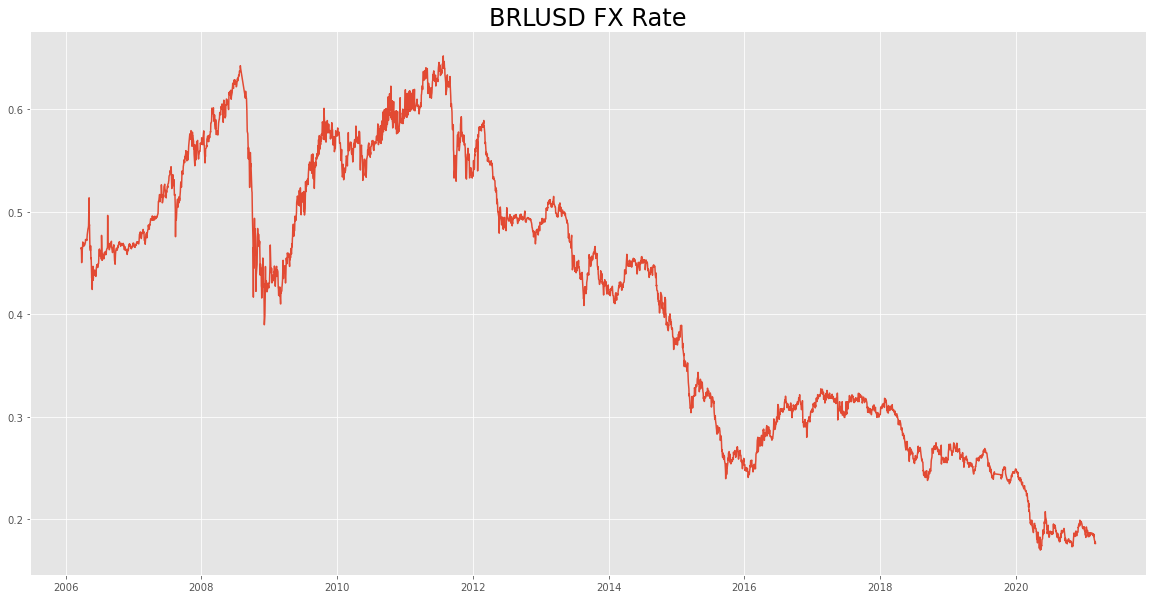

In [67]:
f, ax = plt.subplots(figsize=(20,10))

ax.plot(BRLUSD['Close'])
ax.set_title('BRLUSD FX Rate', fontsize=24)

In [29]:
spx_bvsp_df = indices[['^GSPC', '^BVSP']]   # new df with SP500 and BVSP

In [41]:
spx_bvsp_df = spx_bvsp_df.loc['2006-01-01':]

In [46]:
spx_bvsp_df[['SP500_Pct_Change', 'BVSP_Pct_Change']] = spx_bvsp_df[['^GSPC', '^BVSP']].pct_change()

In [48]:
spx_bvsp_df[['Cum_Returns_SP500','Cum_Returns_BVSP']] = (1 + spx_bvsp_df[['SP500_Pct_Change', 'BVSP_Pct_Change']]).cumprod()

Text(0.5, 1.0, 'SP500 vs BVSP in local currency')

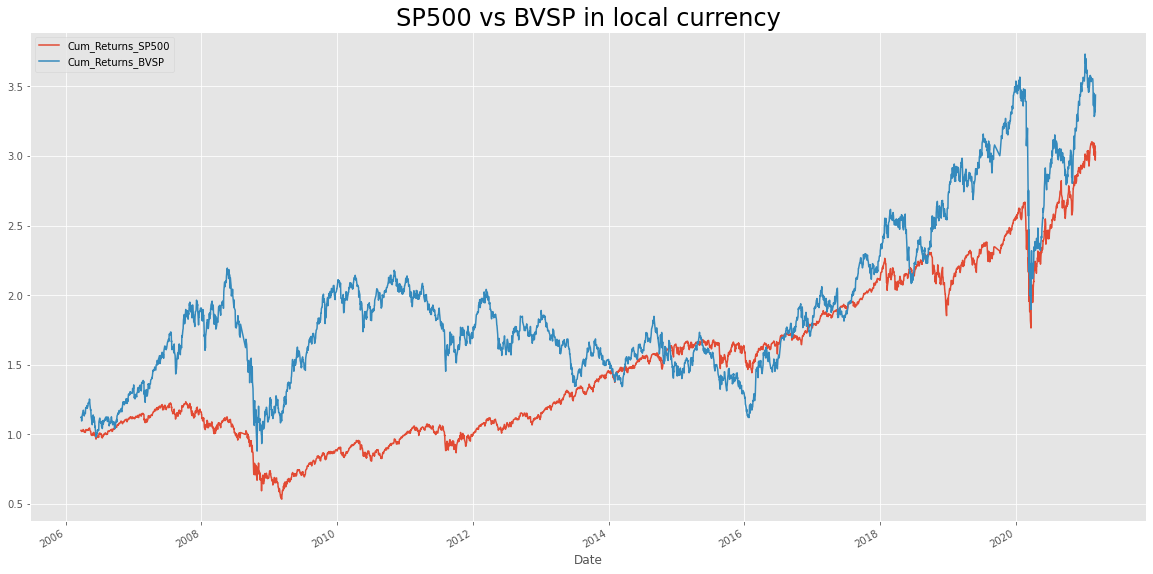

In [66]:
spx_bvsp_df[['Cum_Returns_SP500','Cum_Returns_BVSP']].plot(figsize=(20,10))
plt.title('SP500 vs BVSP in local currency', fontsize=24)

In [55]:
spx_bvsp_df = pd.merge(spx_bvsp_df, BRLUSD['Close'], right_index=True, left_index=True)

In [57]:
spx_bvsp_df = spx_bvsp_df.rename(columns={'Close':'BRLUSD'})

In [61]:
# calculate the returns based on the falling value of the currency.... 
spx_bvsp_df['BVSP_value_in_USD'] = spx_bvsp_df['^BVSP'] * spx_bvsp_df['BRLUSD']

In [62]:
spx_bvsp_df['BVSP_value_in_USD_Pct_Change'] = spx_bvsp_df['BVSP_value_in_USD'].pct_change() 

In [63]:
spx_bvsp_df['Cum_Returns_BVSP_in_USD'] = (1 + spx_bvsp_df['BVSP_value_in_USD_Pct_Change']).cumprod()

Text(0.5, 1.0, 'SP500 vs BVSP in USD')

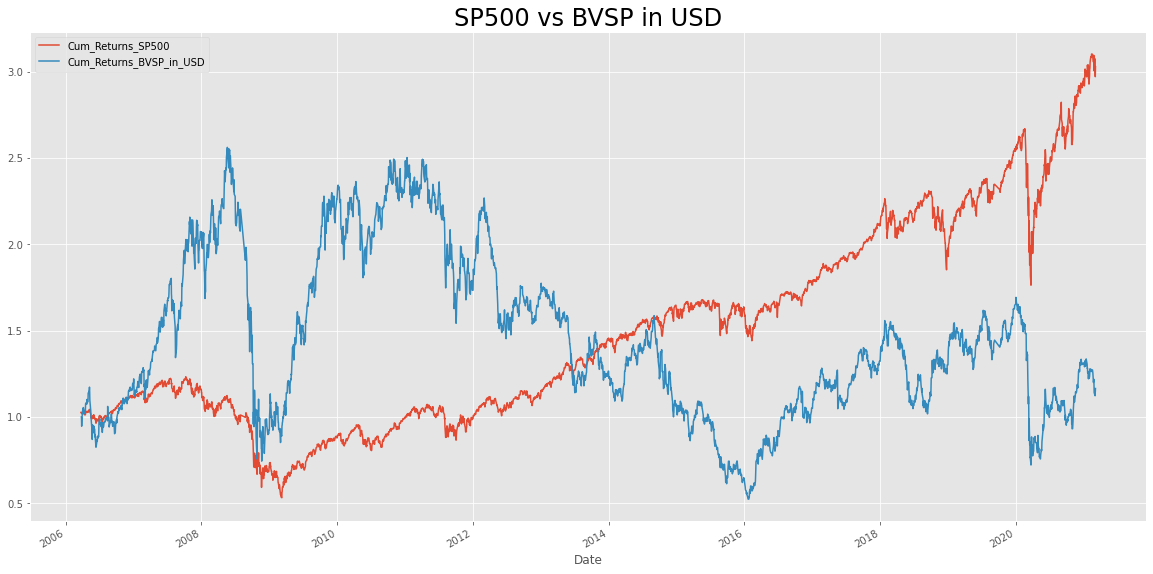

In [65]:
spx_bvsp_df[['Cum_Returns_SP500','Cum_Returns_BVSP_in_USD']].plot(figsize=(20,10))
plt.title('SP500 vs BVSP in USD', fontsize=24)

# Conclusion

My theory about currency inflation was proven correct. When measuring the Brazilian stock market returns in US Dollar value it is barely up at all over this period, and is highly outperformed by the US benchmark index the SP500. 
Always be cautious when investigating/researching foreign asset classes because they may seem like they are outperforming because of currency inflation that leads to asset price inflation. 
